<a href="https://colab.research.google.com/github/pyailabs/Python-Basics/blob/main/iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
X = iris.data
y = iris.target

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)

In [13]:
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


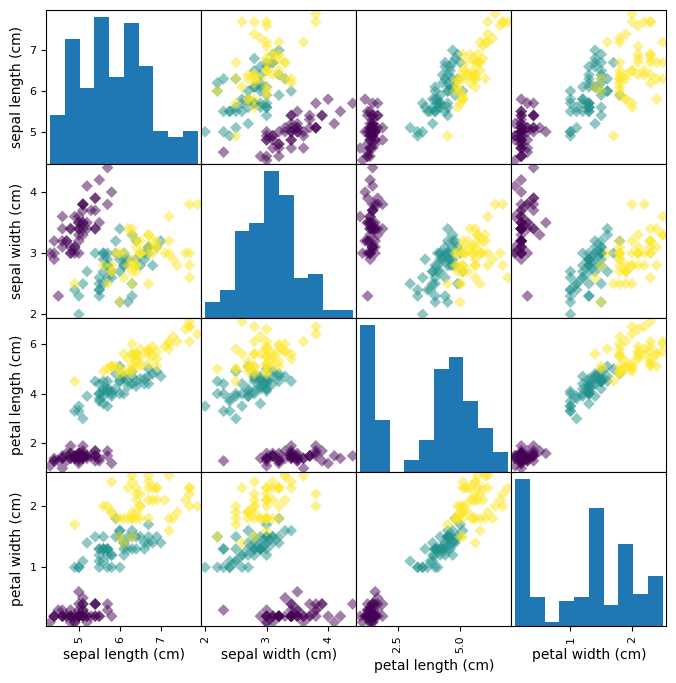

In [16]:
pd.plotting.scatter_matrix(iris_df, c=y, figsize=[8, 8], marker='D')
plt.show()

In [18]:
validation_size = 0.20
seed = 7
scoring = 'accuracy'

In [19]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [22]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [23]:
result = []
names = []

In [24]:
for name, model in models:
    #print(name, model)
    kfold = model_selection.KFold(n_splits = 10)
    cv_result = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    result.append(cv_result)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_result.mean(), cv_result.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
DTC: 0.983333 (0.033333)
GNB: 0.975000 (0.053359)
SVC: 0.983333 (0.033333)


In [25]:
result

[array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.91666667, 1.        , 0.91666667, 1.        ]),
 array([1.        , 1.        , 1.        , 0.91666667, 1.        ,
        1.        , 0.91666667, 1.        , 0.91666667, 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.91666667, 1.        , 1.        , 0.91666667]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.91666667, 1.        , 0.91666667, 1.        ]),
 array([1.        , 1.        , 1.        , 0.91666667, 1.        ,
        1.        , 1.        , 1.        , 0.83333333, 1.        ]),
 array([0.91666667, 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.91666667, 1.        , 1.        , 1.        ])]

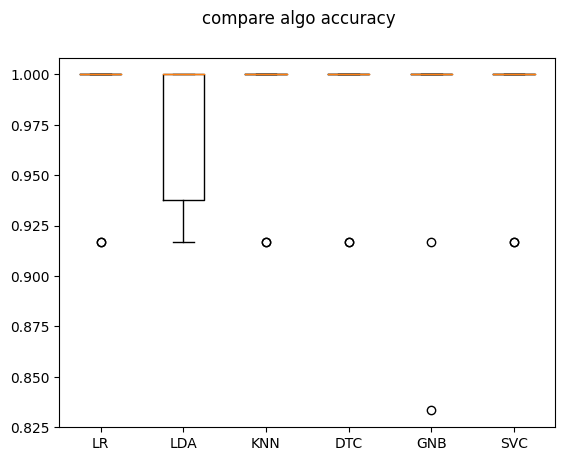

In [26]:
fig = plt.figure()
fig.suptitle("compare algo accuracy")
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [28]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [29]:
predictions = svm.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [30]:
svm.predict([[6.1, 2.6, 5.6, 1.4]])

array([2])

In [31]:
import pickle
filename = 'final_mode.sav'
pickle.dump(svm, open(filename, 'wb'))

In [32]:
loaded_model = pickle.load(open(filename, 'rb'))

In [33]:
loaded_model.predict([[6.1, 2.6, 5.6, 1.4]])

array([2])

In [34]:
loaded_model.predict([[4.7, 3.2, 1.3, 0.2]])

array([0])